In [1]:
from matplotalt import show_with_alt

c:\Users\Kai\anaconda3\envs\main\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Seaborn

From [the seaborn docs](https://seaborn.pydata.org/examples/grouped_barplot.html)

A bar chart. Species is plotted on the x-axis from adelie to gentoo using a categorical scale and body_mass_g is plotted on the y-axis from 0 to 6000 using a linear scale. Male is plotted in dark blue and female is plotted in gray. Male has 3 points, a minimum value of y=3939 at x=chinstrap, a maximum value of y=5485 at x=gentoo, and an average of y=4489. Female has 3 points, a minimum value of y=3369 at x=adelie, a maximum value of y=4680 at x=gentoo, and an average of y=3859.

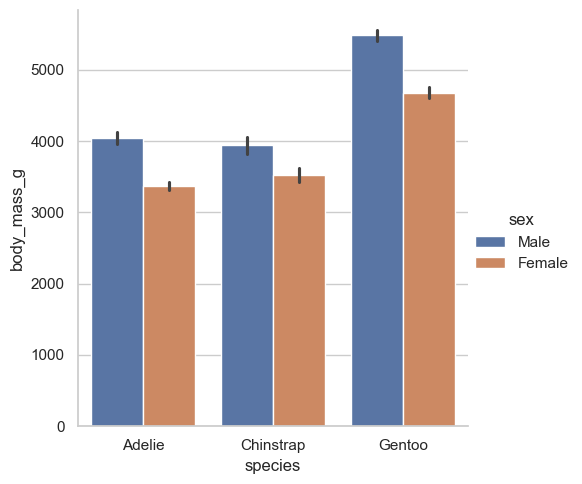

<Figure size 640x480 with 0 Axes>

In [2]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex"
)
show_with_alt(methods="markdown")

# Pandas

From [the pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

A bar chart. The x-axis ranges from -6 to 6 and frequency is plotted on the y-axis from 0 to 400, both using linear scales. A is plotted in dark blue, b is plotted in orange, and c is plotted in gray. A has 10 points, a minimum value of y=0 at x=0, a maximum value of y=332 at x=5, and an average of y=100. B has 10 points, a minimum value of y=0 at x=0, a maximum value of y=342 at x=4, and an average of y=100. C has 10 points, a minimum value of y=0 at x=8, a maximum value of y=351 at x=3, and an average of y=100.

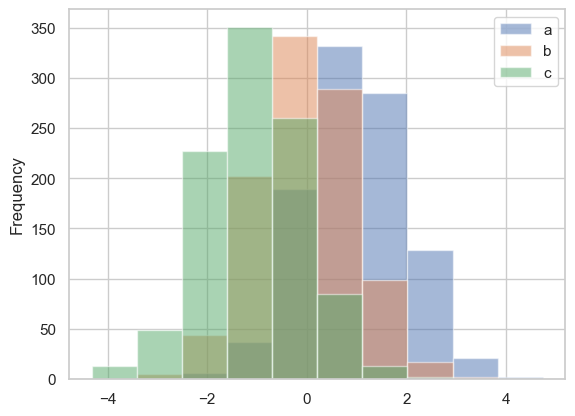

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)
df4.plot.hist(alpha=0.5)

show_with_alt(methods="markdown")

# Astropy

From [the astropy docs](https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_sgr-coordinate-frame.html#sphx-glr-generated-examples-coordinates-plot-sgr-coordinate-frame-py)

A figure with 2 subplots.

 subplot 1: a line plot titled 'sagittarius'. The x-axis ranges from -150° to 150° and the y-axis ranges from -75° to 75°, both using categorical scales. The data are plotted in dark blue.  there is a horizontal line at y=0.0.

 subplot 2: a line plot titled 'icrs'. The x-axis ranges from -150° to 150° and the y-axis ranges from -75° to 75°, both using categorical scales. The data are plotted in dark blue. The data has a minimum value of y=-0.5319 at x=-0.9848, a maximum value of y=0.5318 at x=2.186, and an average of y=-0.003955.

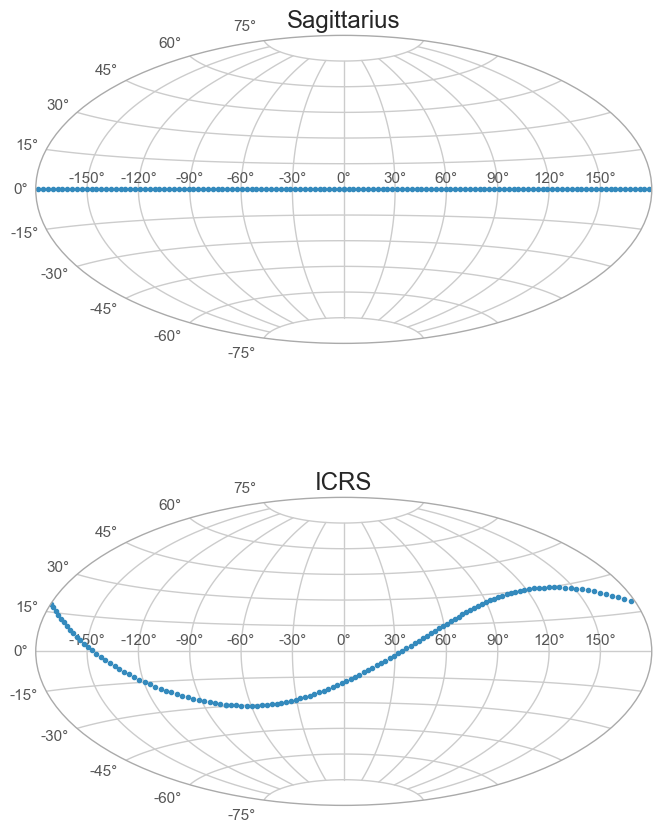

<Figure size 800x600 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import frame_transform_graph
from astropy.coordinates.matrix_utilities import matrix_transpose, rotation_matrix

plt.style.use(astropy_mpl_style)

class Sagittarius(coord.BaseCoordinateFrame):
    """
    A Heliocentric spherical coordinate system defined by the orbit
    of the Sagittarius dwarf galaxy, as described in
        https://ui.adsabs.harvard.edu/abs/2003ApJ...599.1082M
    and further explained in
        https://www.stsci.edu/~dlaw/Sgr/.

    Parameters
    ----------
    representation : `~astropy.coordinates.BaseRepresentation` or None
        A representation object or None to have no data (or use the other keywords)
    Lambda : `~astropy.coordinates.Angle`, optional, must be keyword
        The longitude-like angle corresponding to Sagittarius' orbit.
    Beta : `~astropy.coordinates.Angle`, optional, must be keyword
        The latitude-like angle corresponding to Sagittarius' orbit.
    distance : `~astropy.units.Quantity`, optional, must be keyword
        The Distance for this object along the line-of-sight.
    pm_Lambda_cosBeta : `~astropy.units.Quantity`, optional, must be keyword
        The proper motion along the stream in ``Lambda`` (including the
        ``cos(Beta)`` factor) for this object (``pm_Beta`` must also be given).
    pm_Beta : `~astropy.units.Quantity`, optional, must be keyword
        The proper motion in Declination for this object (``pm_ra_cosdec`` must
        also be given).
    radial_velocity : `~astropy.units.Quantity`, optional, keyword-only
        The radial velocity of this object.

    """

    default_representation = coord.SphericalRepresentation
    default_differential = coord.SphericalCosLatDifferential

    frame_specific_representation_info = {
        coord.SphericalRepresentation: [
            coord.RepresentationMapping("lon", "Lambda"),
            coord.RepresentationMapping("lat", "Beta"),
            coord.RepresentationMapping("distance", "distance"),
        ]
    }

SGR_PHI = (180 + 3.75) * u.degree  # Euler angles (from Law & Majewski 2010)
SGR_THETA = (90 - 13.46) * u.degree
SGR_PSI = (180 + 14.111534) * u.degree

# Generate the rotation matrix using the x-convention (see Goldstein)
SGR_MATRIX = (
    np.diag([1.0, 1.0, -1.0])
    @ rotation_matrix(SGR_PSI, "z")
    @ rotation_matrix(SGR_THETA, "x")
    @ rotation_matrix(SGR_PHI, "z")
)

@frame_transform_graph.transform(
    coord.StaticMatrixTransform, coord.Galactic, Sagittarius
)
def galactic_to_sgr():
    """Compute the Galactic spherical to heliocentric Sgr transformation matrix."""
    return SGR_MATRIX

@frame_transform_graph.transform(
    coord.StaticMatrixTransform, Sagittarius, coord.Galactic
)
def sgr_to_galactic():
    """Compute the heliocentric Sgr to spherical Galactic transformation matrix."""
    return matrix_transpose(SGR_MATRIX)


icrs = coord.SkyCoord(280.161732 * u.degree, 11.91934 * u.degree, frame="icrs")
sgr = icrs.transform_to(Sagittarius)

sgr = coord.SkyCoord(
    Lambda=np.linspace(0, 2 * np.pi, 128) * u.radian,
    Beta=np.zeros(128) * u.radian,
    frame="sagittarius",
)
icrs = sgr.transform_to(coord.ICRS)

fig, axes = plt.subplots(2, 1, figsize=(8, 10), subplot_kw={"projection": "aitoff"})

axes[0].set_title("Sagittarius")
axes[0].plot(
    sgr.Lambda.wrap_at(180 * u.deg).radian,
    sgr.Beta.radian,
    linestyle="none",
    marker=".",
)

axes[1].set_title("ICRS")
axes[1].plot(
    icrs.ra.wrap_at(180 * u.deg).radian, icrs.dec.radian, linestyle="none", marker="."
)

show_with_alt(methods="markdown")

# Sunpy

From [the sunpy docs](https://docs.sunpy.org/en/stable/generated/gallery/map/map_data_histogram.html#sphx-glr-generated-gallery-map-map-data-histogram-py). We comment out vertical axis lines because matplotalt currently does not support overlaid line and bar charts.

A 168x167 image titled 'aia $171 \; \mathrm{\mathring{a}}$ 2011-06-07 06:33:02'. Helioprojective longitude (solar-x) is plotted on the x-axis from -20 to 180 and helioprojective latitude (solar-y) is plotted on the y-axis from -20 to 180, both using linear scales. The data has a minimum value of z=97.32 at (142, 128), a maximum value of z=8150 at (54, 96), and an average of z=772.8.

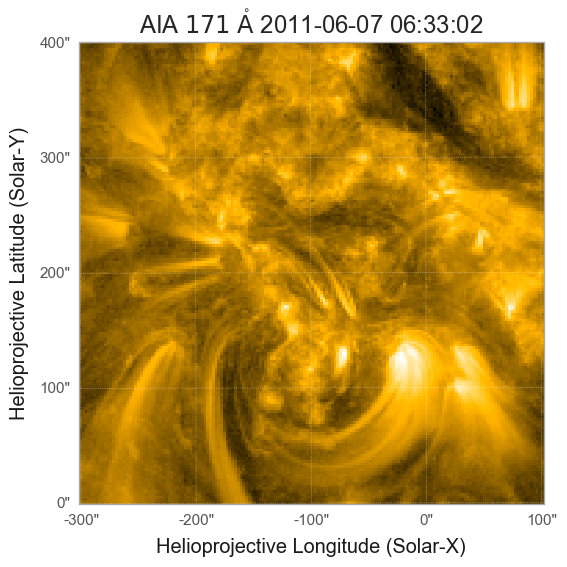

A bar chart. Intensity is plotted on the x-axis from -1000 to 9000 using a linear scale and the y-axis ranges from 10^{-2} to 10^{6} using a categorical scale. Histogram is plotted in dark blue. Histogram has 49 points, a minimum value of x=1 at y=45, a maximum value of x=7031 at y=2, and an average of x=572.6.

<Figure size 800x600 with 0 Axes>

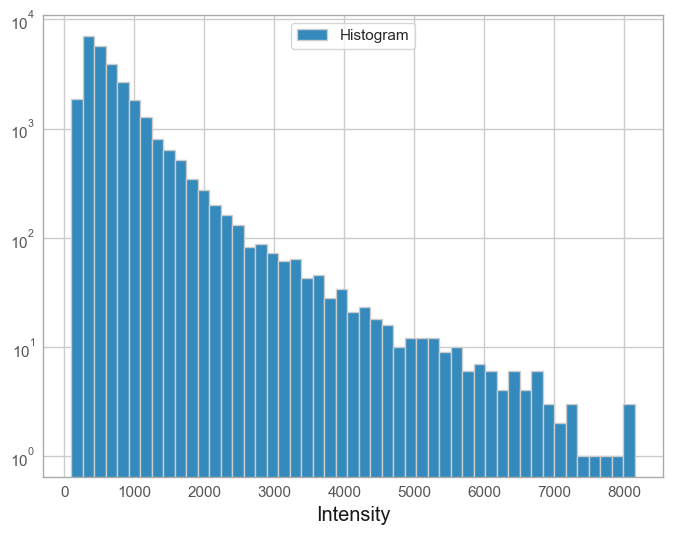

<Figure size 800x600 with 0 Axes>

In [5]:
from matplotalt import show_with_alt

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE

aia = sunpy.map.Map(AIA_171_IMAGE)
bottom_left = SkyCoord(-300 * u.arcsec, 0 * u.arcsec, frame=aia.coordinate_frame)
top_right = SkyCoord(100 * u.arcsec, 400 * u.arcsec, frame=aia.coordinate_frame)
aia_smap = aia.submap(bottom_left, top_right=top_right)
aia_smap.plot()

show_with_alt(methods="markdown")

num_bins = 50
bins = np.linspace(aia_smap.min(), aia_smap.max(), num_bins)
hist, bin_edges = np.histogram(aia_smap.data, bins=bins)

fig, ax = plt.subplots()
# Note that we have to use ``.ravel()`` here to avoid matplotlib interpreting each
# row in the array as a different dataset to histogram.
ax.hist(aia_smap.data.ravel(), bins=bins, label='Histogram')
ax.set_xlabel('Intensity')
#ax.axvline(aia_smap.min(), label=f'Data min={aia_smap.min():.2f}', color='black')
#ax.axvline(aia_smap.max(), label=f'Data max={aia_smap.max():.2f}', color='black')
#ax.axvline(aia_smap.data.mean(),
#           label=f'mean={aia_smap.data.mean():.2f}', color='green')
#one_sigma = np.array([aia_smap.data.mean() - aia_smap.data.std(),
#                      aia_smap.data.mean() + aia_smap.data.std()])
#ax.axvspan(one_sigma[0], one_sigma[1], alpha=0.3, color='green',
#           label=f'mean +/- std = [{one_sigma[0]:.2f}, {one_sigma[1]:.2f}]')
#ax.axvline(one_sigma[0], color='green')
#ax.axvline(one_sigma[1], color='red')
ax.set_yscale('log')
ax.legend(loc=9)

show_with_alt(methods="markdown")

# Mplsignal

From [the mplsignal docs](https://mplsignal.readthedocs.io/en/stable/)

A figure with 4 subplots.

 subplot 1: a line plot. Real part is plotted on the x-axis from -2 to 2 and imaginary part is plotted on the y-axis from -1.5 to 1.5, both using linear scales. There is a vertical line at x=0.0.  there is a horizontal line at y=0.0. Line 1 has a minimum value of y=-0.9992 at x=2, a maximum value of y=0.9992 at x=1, and an average of y=0. Line 2 has a minimum value of y=-0.771 at x=-1, a maximum value of y=0.771 at x=-2, and an average of y=0.

 subplot 2: a line plot. Frequency, rad/sample is plotted on the x-axis from $0$ to $\pi$ using a categorical scale and magnitude, db is plotted on the y-axis from -100 to 20 using a linear scale. The data are plotted in dark blue. The data has a minimum value of y=-81.16 at x=3.135, a maximum value of y=0 at x=0, and an average of y=-29.64.

 subplot 3: a line plot. Frequency, rad/sample is plotted on the x-axis from $0$ to $\pi$ and phase, rad is plotted on the y-axis from $-2.4\pi$ to $0.3\pi$, both using categorical scales. The data are plotted in dark blue. The data has a minimum value of y=-6.496 at x=1.233, a maximum value of y=0 at x=0, and an average of y=-2.041.

 subplot 4: a line plot. Frequency, rad/sample is plotted on the x-axis from $0$ to $\pi$ using a categorical scale and group delay, samples is plotted on the y-axis from -5 to 20 using a linear scale. The data are plotted in dark blue. The data has a minimum value of y=0.3733 at x=3.132, a maximum value of y=17.09 at x=0.9725, and an average of y=2.507.

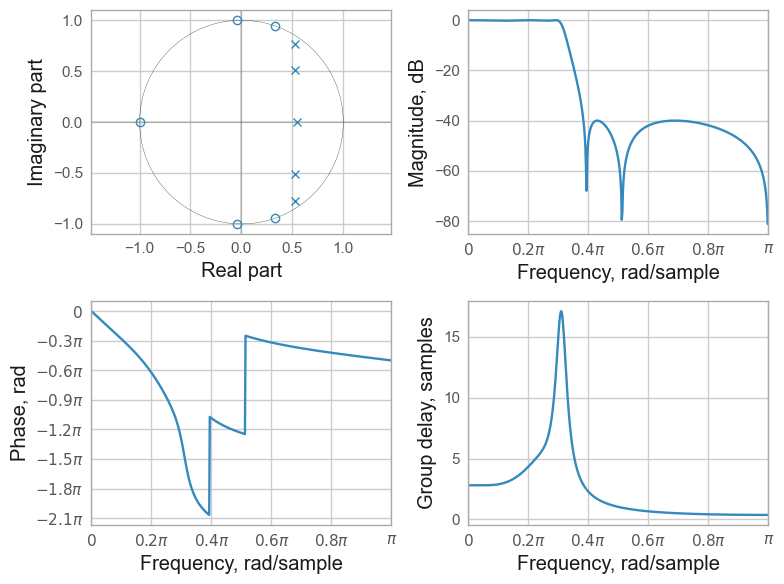

<Figure size 800x600 with 0 Axes>

In [6]:
from scipy.signal import ellip
import matplotlib.pyplot as plt
from mplsignal.freq_plots import freqz
from mplsignal.plane_plots import zplane_tf

a, b = ellip(5, 0.2, 40, 0.3)
fig, axes = plt.subplots(2, 2)
zplane_tf(a, b, ax=axes[0][0])
freqz(a, b, style='magnitude', ax=axes[0][1])
freqz(a, b, style='phase', ax=axes[1][0])
freqz(a, b, style='group_delay', ax=axes[1][1])
plt.tight_layout()

show_with_alt(methods="markdown")